In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importing yfinance library to help us gathering data from Yahoo finance
import yfinance as yf
# Importing datetime and calendar to handling the change from dates to day names
from datetime import datetime
import calendar
%matplotlib inline 

### Let's find out best days to invest in Gold

In [2]:
# Accessing ticker data 
gold = yf.Ticker("Gold")

In [3]:
# Getting GOLD informations
gold.info

{'zip': 'M5J 2S1',
 'sector': 'Basic Materials',
 'longBusinessSummary': "Barrick Gold Corporation engages in the exploration, mine development, production, and sale of gold and copper properties. It has ownership interests in producing gold mines that are located in Argentina, Canada, Côte d'Ivoire, the Democratic Republic of Congo, Dominican Republic, Mali, Tanzania, and the United States. The company also has ownership interests in producing copper mines located in Chile, Saudi Arabia, and Zambia; and various other projects located throughout the Americas and Africa. Barrick Gold Corporation was founded in 1983 and is headquartered in Toronto, Canada.",
 'city': 'Toronto',
 'state': 'ON',
 'country': 'Canada',
 'companyOfficers': [],
 'website': 'https://www.barrick.com',
 'maxAge': 1,
 'address1': 'TD Canada Trust Tower',
 'industry': 'Gold',
 'address2': 'Suite 3700 161 Bay Street Brookfield Place',
 'ebitdaMargins': 0.52279,
 'profitMargins': 0.16871999,
 'grossMargins': 0.39044,

In [4]:
# Getting all history data
data_gold = gold.history(period='MAX')

In [5]:
# Printing the data which is a pandas DataFrame
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-02-13,0.00,0.479703,0.426403,0.426403,19680,0.0,0.0
1985-02-14,0.00,0.479703,0.426403,0.426403,65920,0.0,0.0
1985-02-15,0.00,0.479703,0.426403,0.426403,31360,0.0,0.0
1985-02-19,0.00,0.426403,0.426403,0.426403,9120,0.0,0.0
1985-02-20,0.00,0.426403,0.426403,0.426403,40000,0.0,0.0
...,...,...,...,...,...,...,...
2022-09-02,14.88,15.230000,14.710000,14.900000,19051500,0.0,0.0
2022-09-06,15.00,15.140000,14.720000,14.830000,16585500,0.0,0.0
2022-09-07,14.81,15.500000,14.710000,15.360000,20231200,0.0,0.0


In [6]:
# I created new column name Date, with data of index
data_gold['Date'] = data_gold.index

In [7]:
# I created a lambda function so i can get the names of days from date
data_gold['dayName'] = data_gold['Date'].apply(lambda x : calendar.day_name[x.weekday()])

In [8]:
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName
Date,,,,,,,,,
1985-02-13,0.00,0.479703,0.426403,0.426403,19680,0.0,0.0,1985-02-13,Wednesday
1985-02-14,0.00,0.479703,0.426403,0.426403,65920,0.0,0.0,1985-02-14,Thursday
1985-02-15,0.00,0.479703,0.426403,0.426403,31360,0.0,0.0,1985-02-15,Friday
1985-02-19,0.00,0.426403,0.426403,0.426403,9120,0.0,0.0,1985-02-19,Tuesday
1985-02-20,0.00,0.426403,0.426403,0.426403,40000,0.0,0.0,1985-02-20,Wednesday
...,...,...,...,...,...,...,...,...,...
2022-09-02,14.88,15.230000,14.710000,14.900000,19051500,0.0,0.0,2022-09-02,Friday
2022-09-06,15.00,15.140000,14.720000,14.830000,16585500,0.0,0.0,2022-09-06,Tuesday
2022-09-07,14.81,15.500000,14.710000,15.360000,20231200,0.0,0.0,2022-09-07,Wednesday


In [9]:
# Calculting the daily simple return 'DSR'
data_gold['DSR'] = data_gold['Close'].pct_change()

In [10]:
# Removing the first row of data because it's first day with NaN DSR
data_gold = data_gold[1:]
data_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dayName,DSR
Date,,,,,,,,,,
1985-02-14,0.00,0.479703,0.426403,0.426403,65920,0.0,0.0,1985-02-14,Thursday,0.000000
1985-02-15,0.00,0.479703,0.426403,0.426403,31360,0.0,0.0,1985-02-15,Friday,0.000000
1985-02-19,0.00,0.426403,0.426403,0.426403,9120,0.0,0.0,1985-02-19,Tuesday,0.000000
1985-02-20,0.00,0.426403,0.426403,0.426403,40000,0.0,0.0,1985-02-20,Wednesday,0.000000
1985-02-21,0.00,0.426403,0.426403,0.426403,28960,0.0,0.0,1985-02-21,Thursday,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-09-02,14.88,15.230000,14.710000,14.900000,19051500,0.0,0.0,2022-09-02,Friday,0.021247
2022-09-06,15.00,15.140000,14.720000,14.830000,16585500,0.0,0.0,2022-09-06,Tuesday,-0.004698
2022-09-07,14.81,15.500000,14.710000,15.360000,20231200,0.0,0.0,2022-09-07,Wednesday,0.035738


In [11]:
# Creating new df grouped by dayName and mean values of DSR
df_gold = data_gold.groupby('dayName').mean()
df_gold

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
dayName,,,,,,,,
Friday,16.272998,16.512908,16.045792,16.279994,6.602202e+06,0.000890,0.000106,0.001439
Monday,16.179239,16.403144,15.936713,16.157287,6.104342e+06,0.000633,0.000000,-0.000751
Thursday,16.296340,16.547272,16.041401,16.286050,6.913001e+06,0.000721,0.001049,0.001083
Tuesday,16.239604,16.484060,15.995678,16.237708,6.544793e+06,0.000778,0.002060,0.000646
Wednesday,16.290347,16.550953,16.042202,16.293389,6.886617e+06,0.001451,0.000000,0.001171


Text(0.5, 1.0, 'Best and Worst Days To Invest In The Gold')

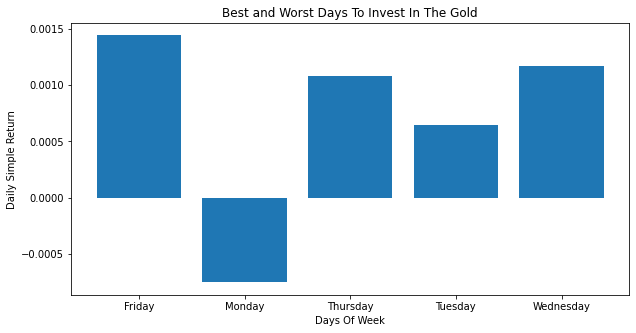

In [12]:
# Plotting the data
fig_gold = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_gold.index, df_gold['DSR'])
plt.xlabel("Days Of Week")
plt.ylabel("Daily Simple Return")
plt.title("Best and Worst Days To Invest In The Gold")

### In general, we can't count on the mean from the beginning of gold market so for that, i will do analysis on the last six months and last year

In [13]:
# Getting data for last year
data_gold1year = gold.history(period='1y')
# Getting data for last six months
data_gold6months = gold.history(period='6mo')

In [14]:
# Let's did the same steps above
# Beginning with last year
data_gold1year['Date'] = data_gold1year.index
data_gold1year['dayName'] = data_gold1year['Date'].apply(lambda x : calendar.day_name[x.weekday()])
data_gold1year['DSR'] = data_gold1year['Close'].pct_change()
data_gold1year = data_gold1year[1:]
data_gold1year = data_gold1year.groupby('dayName').mean()
# Taking a look from dataframe
data_gold1year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
dayName,,,,,,,,
Friday,19.053479,19.341660,18.793804,19.097010,2.024576e+07,0.002000,0.0,0.000500
Monday,19.240505,19.487080,19.006772,19.266967,1.970984e+07,0.005000,0.0,-0.000480
Thursday,19.271405,19.519411,18.955770,19.182153,2.126878e+07,0.003922,0.0,-0.003492
Tuesday,19.217994,19.489692,18.944443,19.200119,1.955173e+07,0.003846,0.0,-0.000908
Wednesday,19.200705,19.522048,18.961558,19.244847,2.027974e+07,0.000000,0.0,0.002298


In [15]:
# Doing the same steps with six months
data_gold6months['Date'] = data_gold6months.index
data_gold6months['dayName'] = data_gold6months['Date'].apply(lambda x : calendar.day_name[x.weekday()])
data_gold6months['DSR'] = data_gold6months['Close'].pct_change()
data_gold6months = data_gold6months[1:]
data_gold6months = data_gold6months.groupby('dayName').mean()
# Taking a look from dataframe
data_gold6months

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
dayName,,,,,,,,
Friday,19.224734,19.538227,18.956487,19.295132,2.029823e+07,0.000000,0.0,0.000008
Monday,19.803618,20.056205,19.540023,19.763005,2.069166e+07,0.000000,0.0,-0.006512
Thursday,19.451398,19.695851,19.080874,19.319997,2.056515e+07,0.007692,0.0,-0.004913
Tuesday,19.508962,19.803085,19.179734,19.439941,2.012950e+07,0.007692,0.0,-0.003183
Wednesday,19.479550,19.725603,19.175669,19.431865,1.950727e+07,0.000000,0.0,-0.001081


### So let's ploting the final resualt to find out

In [16]:
# Creating new dataframe to gather all data i need to plot
# Creating a dictinary to passed to my df
dictt = {
    'All Time(DSR)' : df_gold['DSR'],
    'One Year(DSR)' : data_gold1year['DSR'],
    'Six Months(DSR)' : data_gold6months['DSR'],
}
df_comparison = pd.DataFrame(
    dictt,
    index = df_gold.index
) 
# Let's take a look on df_comparison
df_comparison

,All Time(DSR),One Year(DSR),Six Months(DSR)
dayName,,,
Friday,0.001439,0.000500,0.000008
Monday,-0.000751,-0.000480,-0.006512
Thursday,0.001083,-0.003492,-0.004913
Tuesday,0.000646,-0.000908,-0.003183
Wednesday,0.001171,0.002298,-0.001081


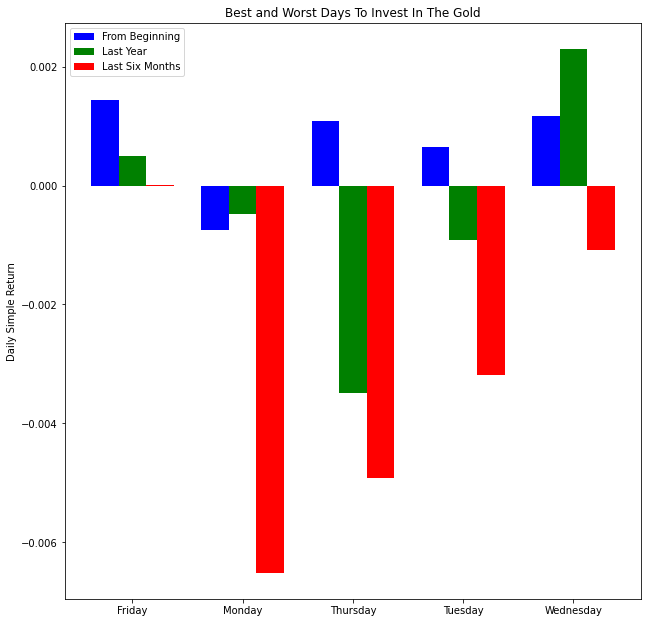

In [17]:
# creating the multiple bar chart
X = np.arange(len(df_comparison))
fig = plt.figure(figsize = (8, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, df_comparison['All Time(DSR)'], color = 'b', width = 0.25, label='From Beginning')
ax.bar(X, df_comparison['One Year(DSR)'], color = 'g', width = 0.25, label='Last Year')
ax.bar(X + 0.25, df_comparison['Six Months(DSR)'], color = 'r', width = 0.25, label='Last Six Months')
plt.ylabel("Daily Simple Return")
plt.title("Best and Worst Days To Invest In The Gold")
ax.set_xticks(X, df_comparison.index)
plt.legend()